# Текстийг онцлог шинж болгон хөрвүүлэх

## One-hot кодчилол

In [ ]:
# санг импортлох
import pandas as pd
# [13]
text = "Мөрөөдлөө бүтэн биелэгдтэл сайн гүй"

# pd.get_dummies үг бүрийг багана болгон хувиргаж,
# тухайн үгийн байгааг 1, байхгүйг 0-оор тэмдэглэнэ
one_hot_df = pd.get_dummies(text.split())
print(one_hot_df)

# Гаралт:
#    Мөрөөдлөө  биелэгдтэл  бүтэн    гүй   сайн
# 0       True       False  False  False  False
# 1      False       False   True  False  False
# 2      False        True  False  False  False
# 3      False       False  False  False   True
# 4      False       False  False   True  False

one_hot_df = pd.get_dummies(text.split()).astype(int)
print(one_hot_df)

# Гаралт:
#    Мөрөөдлөө  биелэгдтэл  бүтэн  гүй  сайн
# 0          1           0      0    0     0
# 1          0           0      1    0     0
# 2          0           1      0    0     0
# 3          0           0      0    0     1
# 4          0           0      0    1     0


   Мөрөөдлөө  биелэгдтэл  бүтэн    гүй   сайн
0       True       False  False  False  False
1      False       False   True  False  False
2      False        True  False  False  False
3      False       False  False  False   True
4      False       False  False   True  False
   Мөрөөдлөө  биелэгдтэл  бүтэн  гүй  сайн
0          1           0      0    0     0
1          0           0      1    0     0
2          0           1      0    0     0
3          0           0      0    0     1
4          0           0      0    1     0


## Тоологч вектор

In [ ]:
# scikit сангаас импортлох
from sklearn.feature_extraction.text import CountVectorizer

# Текст өгөгдөл
text = ["I love NLP and I will learn NLP in 2month "]

# CountVectorizer объект үүсгэх
vectorizer = CountVectorizer()

# Текстийг токенжуулж, үгийн санг бүрдүүлэх
vectorizer.fit(text)

# Текстийг тоологч вектор руу хөрвүүлэх
vector = vectorizer.transform(text)

# Үгийн сан (vocabulary) буюу токенуудын индексүүдийг хэвлэх
print(vectorizer.vocabulary_)

# Тоологч векторын массивыг хэвлэх
print(vector.toarray())

# Гаралт:
# {'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
# [[1 1 1 1 1 2 1]]


{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


## N-grams

In [ ]:
import nltk
nltk.download('punkt_tab')
# textblob санг импортлох
from textblob import TextBlob

text = "I am learning NLP"

# n = 1 тохиолдол буюу unigram үүсгэх
TextBlob(text).ngrams(1)

# Гаралт:
# [WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [ ]:
# n = 2 тохиолдол буюу bigram үүсгэх
TextBlob(text).ngrams(2)

# Гаралт:
# [WordList(['I', 'am']),
# WordList(['am', 'learning']),
# WordList(['learning', 'NLP'])]

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP and I will learn NLP in 2month "]

# CountVectorizer-ийг bigram-ийг үүсгэхээр тохируулах
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Текст дэх bigram-уудыг суралцаж, үгийг индексжүүлэх
vectorizer.fit(text)

# Текстийг тоологч вектор руу хөрвүүлэх
vector = vectorizer.transform(text)

# Үүссэн bigram үгс болон тэдгээрийн индексийг хэвлэх
print(vectorizer.vocabulary_)

# Текстэд bigram үгс хэдэн удаа давтагдсан тоог массив хэлбэрээр хэвлэх
print(vector.toarray())

# Гаралт:
# {'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
# [[1 1 1 1 1 1 1]]

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


## Хамтын матриц

In [ ]:
import numpy as np
import nltk
from nltk import bigrams
import itertools

In [ ]:
# co-occurrence матриц үүсгэх функц тодорхойлох
def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }

    # корпус дахь бүх үгнээс bigram үүсгэх
    bi_grams = list(bigrams(corpus))

    # bigram -уудын давтамжийг тоолох ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))

    # co-occurrence матрицыг үүсгэх
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    # bigram бүрээр давтаж co-occurrence тоог оруулах
    for bigram, count in bigram_freq:
        previous, current = bigram
        pos_previous = vocab_to_index[previous]
        pos_current = vocab_to_index[current]
        co_occurrence_matrix[pos_current][pos_previous] = count

    co_occurrence_matrix = np.matrix(co_occurrence_matrix)

    # матриц болон үгийн индексийн толь буцаах
    return co_occurrence_matrix, vocab_to_index


In [ ]:
import pandas as pd
# туршилтын өгөгдөл
sentences = [['I', 'love', 'nlp'],
            ['I', 'love','to' 'learn'],
            ['nlp', 'is', 'future'],
            ['nlp', 'is', 'cool']]

# олон жагсаалтыг нэг жагсаалт болгон нэгдүүлэх
merged = list(itertools.chain.from_iterable(sentences))

# co-occurrence матриц үүсгэх
matrix, vocab_index = co_occurrence_matrix(merged)

# үр дүнг датафреймээр харах
# vocab_index бол үгийн индексийн толь
CoMatrixFinal = pd.DataFrame(matrix, index=vocab_index.keys(), columns=vocab_index.keys())
print(CoMatrixFinal)

# Гаралт:



           I  love  future   is  tolearn  nlp  cool
I        0.0   0.0     0.0  0.0      0.0  1.0   0.0
love     2.0   0.0     0.0  0.0      0.0  0.0   0.0
future   0.0   0.0     0.0  1.0      0.0  0.0   0.0
is       0.0   0.0     0.0  0.0      0.0  2.0   0.0
tolearn  0.0   1.0     0.0  0.0      0.0  0.0   0.0
nlp      0.0   1.0     1.0  0.0      1.0  0.0   0.0
cool     0.0   0.0     0.0  1.0      0.0  0.0   0.0


## Хэш вектор

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# туршилтын өгөгдөл
text = ["The quick brown fox jumped over the lazy dog."]

# 10 хэмжээтэй (n_features=10) хэш векторжуулагч үүсгэх
vectorizer = HashingVectorizer(n_features=10)

# Текстийг хэш вектор болгон хувиргах
vector = vectorizer.transform(text)

# Векторыг харуулах
print(vector.shape)	# Векторын хэмжээ (1 мөр, 10 багана)
print(vector.toarray())	# Векторыг массив болгон хэвлэх

# Гаралт:
# (1, 10)
# [[ 0.   0.57735027  0.  0.  0.  0.  0.  -0.57735027     -0.57735027     0.]]

(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


## TF-IDF

In [ ]:
# TfidfVectorizer импортлох
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

# Векторжуулагч үүсгэх
vectorizer = TfidfVectorizer()

#Текстийг токен болгон хувиргах ба сургах
vectorizer.fit(text)

# Тохируулагдсан үгийн сан (vocabulary) болон үгийн IDF утгуудыг хэвлэх
print(vectorizer.vocabulary_)	# Үгийн индексийн толь
print(vectorizer.idf_)	# Үг бүрийн IDF утга

# Гаралт:
# {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
# [1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
#  1.69314718 1.        ]


{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


## Skip-Gram

In [1]:
# жишээ өгүүлбэрүүд
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of',
        'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]



In [2]:
# шаардлагатай сангуудыг суулгаж, импортлох
!pip install gensim

from gensim.models import Word2Vec

# Skip-Gram сургалтын загвар
skipgram = Word2Vec(
    sentences,
    vector_size = 50,
    window = 3,
    min_count = 1,
    sg = 1
)
print(skipgram)

# 'nlp' үгэнд зориулсан вектор
print(skipgram.wv['nlp'])

Word2Vec<vocab=21, vector_size=50, alpha=0.025>
[-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]


In [6]:
# deep үгэнд зориулсан вектор руу хандах
print(skipgram.wv['deep'])

# Гаралт:
# KeyError: “word ‘deep’ not in vocabulary”

KeyError: "Key 'deep' not present"

In [7]:
# Загварыг хадгалах
skipgram.save('skipgram.bin')

# Загварыг дуудах
skipgram = Word2Vec.load('skipgram.bin')

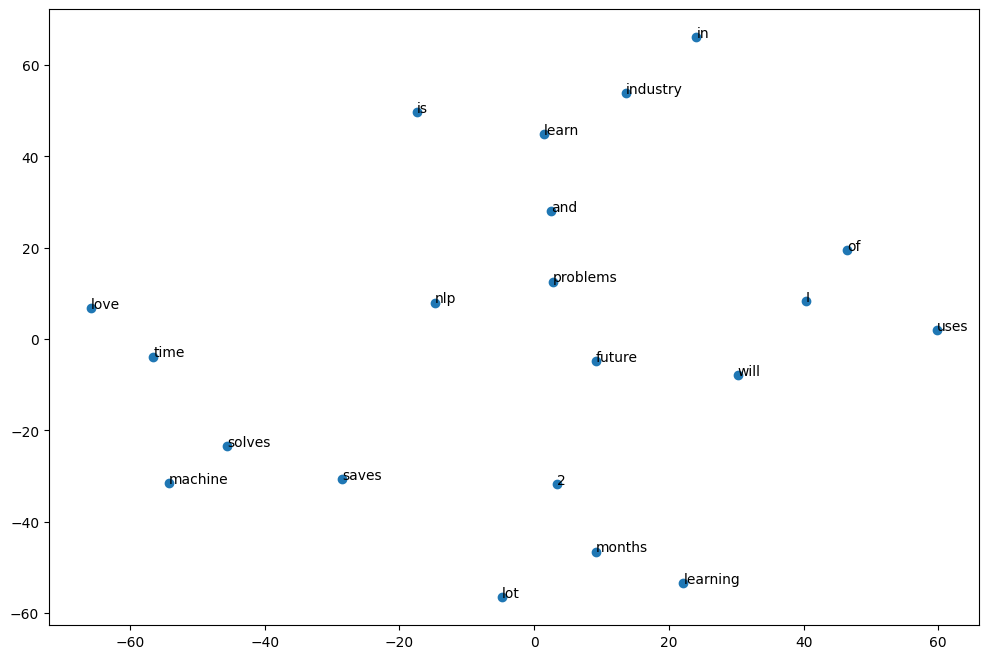

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# skipgram.wv.index_to_key - сурсан үгийн жагсаалт
words = list(skipgram.wv.index_to_key)

# Үг бүрийн векторуудыг авч байна
X = skipgram.wv[words]

# t-SNE хэрэглэх
# n_components = 2 - 2 хэмжээст рүү бууруулах
# random_state = 42 - үр дүнг тогтвортой гаргахын тулд
# perplexity = 5 - ойрын хөршүүдийн тоог тохируулж байна, жижиг өгөгдөлд бага утга тохиромжтой
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
result = tsne.fit_transform(X)

# Скаттер график үүсгэх
plt.figure(figsize=(12, 8)) # Зургийн хэмжээ
plt.scatter(result[:, 0], result[:, 1]) # # t-SNE-ээр гарсан координатууд дээр цэгүүд зурах

# График дээр үгсийг байрлуулах (аннотаци хийх)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# График харуулах
plt.show()


## CBOW

In [10]:
# шаардлагатай сангууд
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


In [11]:
# жишээ өгүүлбэрүүд
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of',
			  'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]


In [15]:
# CBOW загвараар Word2Vec моделийг сургаж байна
# vector_size = 50 - үгийн векторын хэмжээ буюу бүрдэл хэмжээ 50
# window = 3 - төв үгийн өмнөх ба дараах 3 үгийг харгалзан сурах хүрээ
# min_count = 1 - хамгийн багадаа 1 удаа гарсан үгсийг сурах
# sg = 0 -> CBOW загварыг сонгох (skip-gram бол sg=1)
cbok = Word2Vec(
			sentences,
			vector_size = 50,
			window = 3,
			min_count = 1,
			sg = 0
)

# Моделийн товч мэдээллийг хэвлэх
print(cbok)




Word2Vec<vocab=21, vector_size=50, alpha=0.025>


In [16]:
# nlp үгэнд зориулсан вектор руу хандах
print(cbok['nlp'])

TypeError: 'Word2Vec' object is not subscriptable

In [17]:
# Загварыг хадгалах
cbok.save('cbok.bin')

# Загварыг дуудах
cbok = Word2Vec.load('cbok.bin')

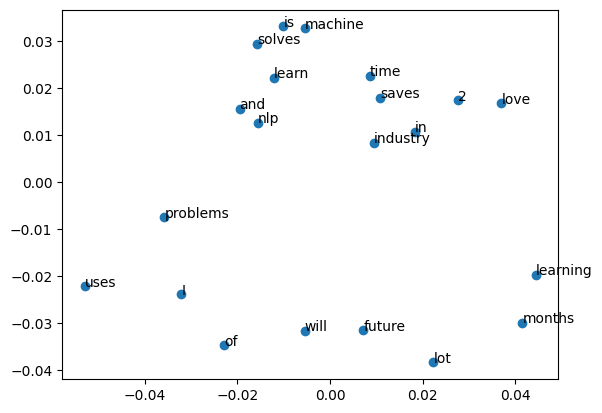

In [18]:
# Загварын үгийн бүх түлхүүр буюу үгсийн жагсаалт
words = list(cbok.wv.index_to_key)

# Үг бүрийн векторуудыг авах
X = cbok.wv[words]

# PCA-гаар хэмжээ бууруулах: 50 хэмжээст векторыг 2 хэмжээст болгоно
pca = PCA(n_components=2)
# PCA-г сургалтын векторуудад хэрэглэнэ
result = pca.fit_transform(X)

# 2D скаттер график байгуулах
pyplot.scatter(result[:, 0], result[:, 1])

# Цэг бүр дээр тухайн үгийг бичиж харуулах
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

# Графикийг дэлгэцэд гаргах
pyplot.show()


In [ ]:
# gensim багцыг импортлох
from gensim.models import KeyedVectors

# Google-ийн урьдчилан бэлтгэсэн Word2Vec загварыг ачаалах
# Файл замыг өөрийн компьютерт байгаа байршилд тааруулна. Жишээ нь:
model_path = 'C:\\Users\\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [ ]:
# 'this' ба 'is' үгийн төстэй байдлыг шалгах
similarity_this_is = model.similarity('this', 'is')
print(similarity_this_is)
# Гаралт: 0.407970363878

# 'post' ба 'book' үгийн төстэй байдлыг шалгах
similarity_post_book = model.similarity('post', 'book')
print(similarity_post_book)
# Гаралт: 0.0572043891977

In [ ]:
# оролтуудаас тохирохгүйг олох
odd_word = model.doesnt_match('breakfast cereal dinner lunch'.split())
print(odd_word)
# Гаралт: 'cereal'

# хоёр үгийн хоорондын харилцан хамаарлыг олох
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print(result)
# Гаралт:
# queen: 0.7699

## fastText фреймворк

In [19]:
# gensim-ийн FastText загварыг ашиглах
from gensim.models import FastText

# PCA (Principal Component Analysis) ашиглан векторын хэмжээг бууруулах
from sklearn.decomposition import PCA

# Matplotlib ашиглан үгийн векторыг дүрслэх
from matplotlib import pyplot

In [20]:
# Жишээ өгүүлбэрүүд
sentences = [['I', 'love', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
            ['nlp', 'uses', 'machine', 'learning']]


In [21]:
# FastText загвар үүсгэх
fast = FastText(
    sentences,       # Сургалтын өгөгдөл (өгүүлбэрүүдийн жагсаалт)
    vector_size = 20,  # Үгийн векторыг 20 хэмжээст болгох
    window = 1,        # Нэг үгнээс баруун/зүүн тал руу харах үгийн тоо
    min_count = 1,     # Давтамж 1-ээс бага үгийг хасахгүй
    workers = 5,       # CPU-ийн 5 цөм ашиглах
    min_n = 1,         # Subword-ийн хамгийн бага урт
    max_n = 2          # Subword-ийн хамгийн их урт
)

# ‘nlp’ үгийн векторыг авах
print(fast.wv['nlp'])

[-0.01044169 -0.00166992  0.00851491 -0.00545158 -0.01564237  0.01678065
  0.00298395  0.00162992 -0.01518791  0.00655623  0.01039656 -0.00142836
 -0.01665709  0.00949577  0.00262534 -0.00541661  0.0063507  -0.00105192
 -0.02014117  0.00102295]


In [22]:
# 'deep' үгийн векторыг авах
print(fast.wv['deep'])




[-0.00718654 -0.00310375 -0.00214245 -0.00143114 -0.00600196  0.00922425
  0.01241926 -0.00713524 -0.00693269 -0.00987075  0.01335533 -0.00810269
  0.01761531 -0.00716007 -0.00427308  0.00729467  0.01494505 -0.01626069
  0.01229173  0.01455308]


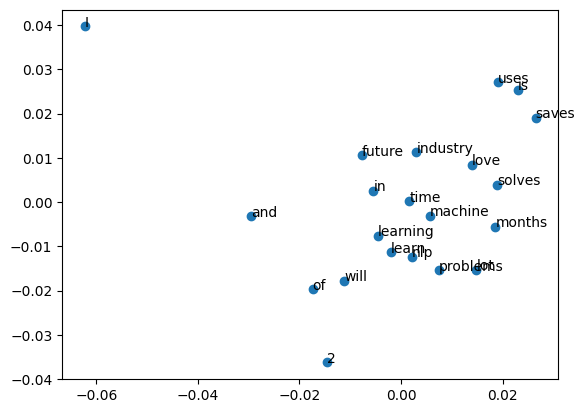

In [23]:
# from gensim.models import Word2Vec
fast.save('fast.bin')

# Загварыг дахин дуудах
fast = FastText.load('fast.bin')

# Загварт байгаа бүх үгийн жагсаалт авах
words = list(fast.wv.index_to_key)

# Үгийн векторуудыг авах
X = fast.wv[words]

# PCA ашиглан 2 хэмжээст болгон бууруулах
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Скаттер диаграм байгуулах
pyplot.scatter(result[:, 0], result[:, 1])

# Үг бүрийг график дээр бичих
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

pyplot.show()